In [43]:
# importing packages
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import imblearn
from palettable.colorbrewer.qualitative import Pastel1_3

## 相亲数据
### 1. 数据预处理
#### - 数据可视化、探索
#### - 数据预处理（空值删除、缺失率、删除重复数据等）
#### - 特征工程（数据特征筛选）
### 2. 模型训练（决策树、神经网络）
### 3. 测试
#### - 交叉验证
#### - 准确率、recall、精确率、F1、PR曲线、ROC、AUC


In [53]:
df = pd.read_csv('./speed_dating_train.csv', encoding='gbk')
dating_test = pd.read_csv('./speed_dating_test.csv', encoding='gbk')

In [54]:
dating_test.head(5)

,uid,iid,id,gender,idg,condtn,wave,round,position,positin1,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,match
0,0,393,15,0,29,2,15,19,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,187,4,1,8,1,8,10,4,1.0,...,9.0,12.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,0
2,2,474,9,0,17,2,19,15,8,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,383,5,0,9,2,15,19,8,8.0,...,8.0,5.0,6.0,4.0,7.0,8.0,6.0,7.0,5.0,1
4,4,360,20,0,38,2,14,18,1,1.0,...,9.0,8.0,7.0,8.0,8.0,9.0,7.0,7.0,8.0,0


### 数据预处理

##### 数据可视化、探索

In [55]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({
    'column_name': df.columns,
    'percent_missing': percent_missing
})
missing_value_df.sort_values(by='percent_missing',ascending=False)

,column_name,percent_missing
num_in_3,num_in_3,92.014015
numdat_3,numdat_3,82.167452
expnum,expnum,78.482542
sinc7_2,sinc7_2,76.658209
amb7_2,amb7_2,76.658209
...,...,...
wave,wave,0.000000
condtn,condtn,0.000000
idg,idg,0.000000
gender,gender,0.000000


83.63 16.37


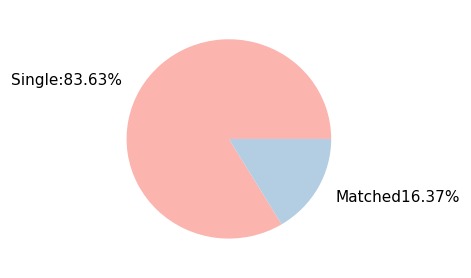

In [56]:
# 多少人通过Speed Dating找到了对象,即match=1
plt.subplots(
    figsize=(3, 3),
    dpi=110,
)
# 构造数据
size_of_groups = df.match.value_counts().values

single_percentage = round(size_of_groups[0] / sum(size_of_groups) * 100, 2)
matched_percentage = round(size_of_groups[1] / sum(size_of_groups) * 100, 2)
names = [
    'Single:' + str(single_percentage) + '%',
    'Matched' + str(matched_percentage) + '%']

print(single_percentage, matched_percentage)

 
# 创建饼图
plt.pie(
    size_of_groups, 
    labels=names, 
    labeldistance=1.2, 
    colors=Pastel1_3.hex_colors
)
plt.show()

83.6 16.4


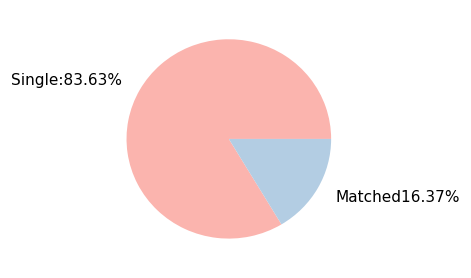

In [57]:
# 多少女生通过Speed Dating找到了对象
plt.subplots(figsize=(3, 3), dpi=110, )
# 构造数据
size_of_groups1 = df[df.gender == 1].match.value_counts().values  # 男生只需要吧0替换成1即可

single_percentage1 = round(size_of_groups1[0] / sum(size_of_groups1) * 100, 2)
matched_percentage1 = round(size_of_groups1[1] / sum(size_of_groups1) * 100, 2)
print(single_percentage1, matched_percentage1)

names1 = [
    'Single:' + str(single_percentage) + '%',
    'Matched' + str(matched_percentage) + '%']

# 创建饼图
plt.pie(
    size_of_groups1, 
    labels=names1, 
    labeldistance=1.2, 
    colors=Pastel1_3.hex_colors
)
plt.show()

In [49]:
# 查看特征缺失率
# 找出确实率大于50%以上的，删除之
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({
    'column_name': df.columns,
    'percent_missing': percent_missing
})

print(missing_value_df.sort_values(by='percent_missing',ascending=False))

miss=[]
for index, rows in missing_value_df.iterrows():
    if rows['percent_missing']>=30:
        miss.append(rows['column_name'])
print(miss, len(miss))

         column_name  percent_missing
num_in_3    num_in_3        92.014015
numdat_3    numdat_3        82.167452
expnum        expnum        78.482542
sinc7_2      sinc7_2        76.658209
amb7_2        amb7_2        76.658209
...              ...              ...
wave            wave         0.000000
condtn        condtn         0.000000
idg              idg         0.000000
gender        gender         0.000000
dec              dec         0.000000

[195 rows x 2 columns]
['undergra', 'mn_sat', 'tuition', 'income', 'expnum', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2', 'you_call', 'them_cal', 'date_3', 'numdat_3'

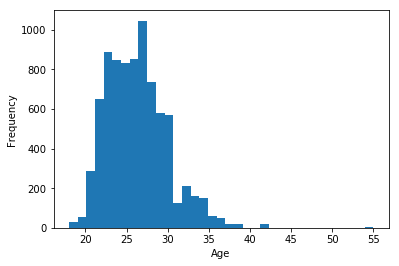

In [58]:
# 年龄分布
age = df[np.isfinite(df['age'])]['age']
plt.hist(age,bins=35)
plt.xlabel('Age')
plt.ylabel('Frequency')


# 根据热力图、缺失率选择一些特征
date_df = df[[
    'iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o',
    'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
    'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o',
    'prob_o', 'met_o', 'age', 'race', 'imprace', 'imprelig', 'goal', 'date',
    'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
    'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
    'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1',
    'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1',
    'fun3_1', 'intel3_1', 'attr', 'sinc', 'intel', 'fun', 'like',
    'prob', 'met'
]]
dating_test = dating_test[[
    'iid', 'gender', 'pid', 'int_corr', 'samerace', 'age_o',
    'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
    'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o',
    'prob_o', 'met_o', 'age', 'race', 'imprace', 'imprelig', 'goal', 'date',
    'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
    'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
    'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1',
    'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1',
    'fun3_1', 'intel3_1', 'attr', 'sinc', 'intel', 'fun', 'like',
    'prob', 'met','match'
]]

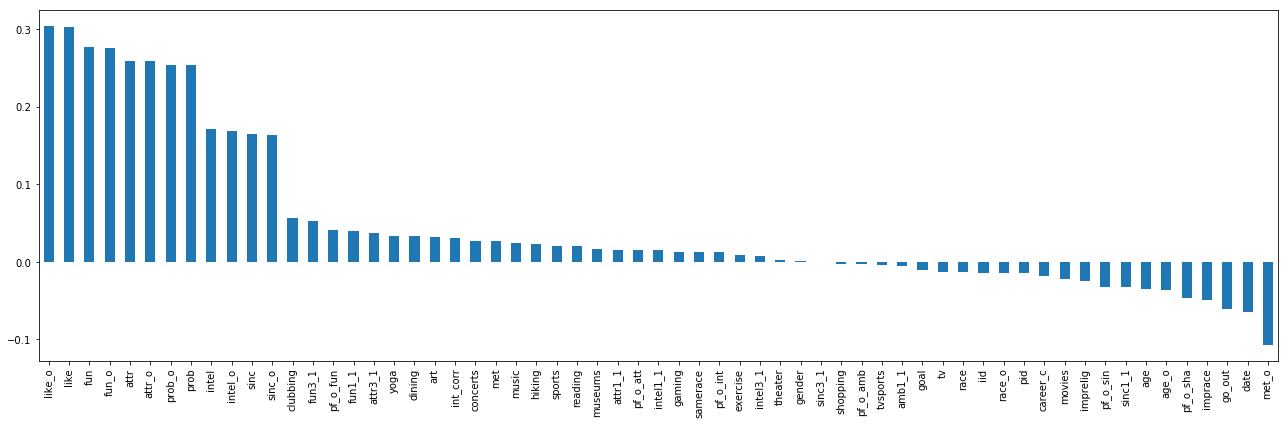

In [59]:
corr = date_df.corr('pearson')
plt.figure(figsize=(18,6))
corr['match'].sort_values(ascending=False)[1:].plot(kind='bar')
plt.tight_layout()

##### 数据预处理

In [60]:
# 针对训练集，删除有缺失值的行
date_df.dropna(inplace=True)

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [61]:
# 针对测试集，缺失位置补0
dating_test = dating_test.fillna(0)

In [62]:
# clean_df = date_df[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'match']]
x = date_df.drop(columns=['match'])
y = date_df['match']

x_Test=dating_test.drop(columns=['match'])
y_Test=dating_test['match']
# print(dating_test)

print(x.shape,y.shape)
print(y)

(6714, 61) (6714,)
0       0
1       0
2       0
3       0
4       1
       ..
8270    0
8271    0
8272    0
8273    0
8276    0
Name: match, Length: 6714, dtype: int64


[5547 1167]


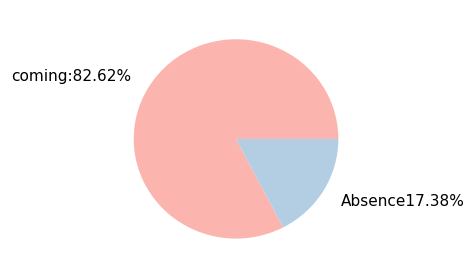

In [63]:
# 看看数据是否平衡
# 多少人通过Speed Dating找到了对象
plt.subplots(figsize=(3,3), dpi=110,)
# 构造数据
size_of_groups=y.value_counts().values

print(size_of_groups)

single_percentage = round(size_of_groups[0]/sum(size_of_groups) * 100,2) 
matched_percentage = round(size_of_groups[1]/sum(size_of_groups)* 100,2) 
names = [
    'coming:' + str(single_percentage) + '%',
    'Absence' + str(matched_percentage) + '%']
 
# 创建饼图
plt.pie(
    size_of_groups, 
    labels=names, 
    labeldistance=1.2, 
    colors=Pastel1_3.hex_colors
)
plt.show()

### 模型训练

In [64]:
# 做训练集和测试集分割
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
print(X_train.shape,X_test.shape)

(5371, 61) (1343, 61)


In [70]:
# # 过采样，平衡数据
oversample = imblearn.over_sampling.SVMSMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

[1110  233]


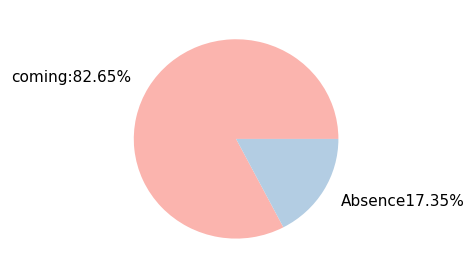

In [71]:
# 看看数据是否平衡
# 多少人通过Speed Dating找到了对象
plt.subplots(figsize=(3,3), dpi=110,)
# 构造数据
size_of_groups=y_test.value_counts().values

print(size_of_groups)

single_percentage = round(size_of_groups[0]/sum(size_of_groups) * 100,2) 
matched_percentage = round(size_of_groups[1]/sum(size_of_groups)* 100,2) 
names = [
    'coming:' + str(single_percentage) + '%',
    'Absence' + str(matched_percentage) + '%']
 
# 创建饼图
plt.pie(
    size_of_groups, 
    labels=names, 
    labeldistance=1.2, 
    colors=Pastel1_3.hex_colors
)
plt.show()

##### ExtraTreesClassifier

##### 决策树

In [72]:
dtc=DecisionTreeClassifier()

In [73]:

# pre_train=dtc.predict(X_train)
# pre_test=dtc.predict(X_test)

# print(pre_test)
# print(y_test)

# print('Training Accuracy:', metrics.accuracy_score(y_train, pre_train))
# print('Validation Accuracy:', metrics.accuracy_score(y_test, pre_test))

In [74]:
print(cross_val_score(dtc, X_train, y_train, cv=5))

dtc.fit(X_train, y_train)

pre_test=dtc.predict(x_Test)
print("acc:{} recall:{} precision:{} f1:{}".format(metrics.accuracy_score(y_Test,pre_test), 
                                                    metrics.recall_score(y_Test, pre_test),
                                                    metrics.precision_score(y_Test,pre_test),
                                                    metrics.f1_score(y_Test,pre_test)))

[0.66985915 0.88338028 0.89239437 0.91492958 0.91375423]
acc:0.8316831683168316 recall:0.64 precision:0.6666666666666666 f1:0.6530612244897959


##### 神经网络

In [75]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

mlp=MLPClassifier(random_state=2, max_iter=3000).fit(X_train, y_train)
print(mlp.predict_proba(X_test))

pre_test_mlp=mlp.predict(X_test)
print(pre_test_mlp)

print(confusion_matrix(y_test,pre_test_mlp))

print(mlp.score(X_test, y_test))

[[6.03893430e-01 3.96106570e-01]
 [9.98548035e-01 1.45196542e-03]
 [9.85206890e-01 1.47931105e-02]
 ...
 [9.71271454e-01 2.87285464e-02]
 [7.81785828e-01 2.18214172e-01]
 [9.99977596e-01 2.24035174e-05]]
[0 0 0 ... 0 0 0]
[[1033   77]
 [ 131  102]]
0.8451228592702904


In [24]:
# 预测出来匹配成功的人
np.where(np.array(pre_test_mlp==1))

(array([   4,   12,   15,   16,   20,   22,   23,   24,   25,   29,   31,
          32,   33,   38,   42,   44,   45,   50,   51,   54,   58,   59,
          60,   65,   67,   70,   74,   78,   79,   85,   91,   94,   98,
         106,  110,  112,  117,  126,  131,  132,  141,  143,  151,  164,
         167,  175,  180,  181,  183,  185,  188,  191,  199,  201,  204,
         205,  212,  213,  216,  220,  225,  228,  230,  234,  236,  244,
         249,  251,  254,  256,  265,  267,  269,  272,  286,  287,  289,
         290,  291,  294,  295,  299,  302,  306,  313,  314,  320,  322,
         328,  332,  348,  350,  356,  359,  367,  370,  371,  385,  386,
         389,  390,  391,  394,  395,  406,  409,  413,  414,  419,  425,
         431,  433,  447,  454,  456,  459,  476,  477,  478,  479,  480,
         491,  495,  499,  500,  501,  502,  505,  511,  515,  522,  526,
         533,  534,  538,  544,  546,  551,  562,  565,  575,  577,  579,
         581,  584,  585,  590,  600, 

In [25]:
# 实际匹配成功的人
np.where(np.array(y_test)==1)

(array([   4,   12,   16,   20,   22,   29,   42,   45,   52,   59,   63,
          91,   96,   98,  108,  112,  139,  141,  143,  146,  151,  161,
         164,  165,  174,  175,  180,  181,  183,  201,  204,  212,  213,
         216,  225,  232,  244,  249,  251,  267,  270,  287,  296,  298,
         299,  301,  306,  322,  326,  332,  350,  356,  363,  367,  371,
         385,  386,  390,  391,  395,  402,  406,  413,  414,  421,  431,
         447,  459,  464,  470,  477,  478,  479,  480,  489,  491,  495,
         502,  503,  504,  519,  524,  526,  529,  530,  533,  545,  550,
         552,  557,  563,  568,  570,  578,  581,  588,  590,  598,  600,
         602,  605,  621,  622,  625,  638,  643,  644,  652,  654,  665,
         666,  671,  675,  682,  684,  688,  707,  710,  718,  727,  728,
         739,  748,  749,  751,  753,  760,  761,  763,  767,  769,  774,
         783,  796,  798,  800,  803,  805,  827,  829,  833,  836,  838,
         840,  842,  861,  863,  871, 

In [26]:
np.savetxt("pre_test_mlp.txt",pre_test_mlp)

### 测试

In [79]:

from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense


def build_classifier():
    classifier = Sequential()
    classifier.add(
        Dense(units=4,
              kernel_initializer="uniform",
              activation="tanh",
              input_dim=x_sj.shape[1]))
    classifier.add(
        Dense(units=2, kernel_initializer="uniform", activation="tanh"))
    classifier.add(
        Dense(units=1, kernel_initializer="uniform", activation="sigmoid"))
    classifier.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])
    return classifier


x_sj = (X_train.values.T).T
y_sj = (y_train.values.reshape(1, y_train.shape[0])).T

classifier = KerasClassifier(build_fn=build_classifier, epochs=20)
accuracies = cross_val_score(estimator=classifier, X=x_sj, y=y_sj, cv=3)
mean = accuracies.mean()

print(accuracies)
print("Accuracy mean :", mean)

his=classifier.fit(X_train, y_train)
preTest = classifier.predict(x_Test)
print("神经网络预测出的测试acc为：{} ， recall为：{} ， precision为：{} ， f1为：{}".format(
    metrics.accuracy_score(y_Test, preTest),
    metrics.recall_score(y_Test, preTest),
    metrics.precision_score(y_Test, preTest),
    metrics.f1_score(y_Test, preTest)))


Epoch 1/20
185/185 [==============================] - 0s 961us/step - loss: 0.6697 - accuracy: 0.6599
Epoch 2/20
185/185 [==============================] - 0s 862us/step - loss: 0.6422 - accuracy: 0.6611
Epoch 3/20
185/185 [==============================] - 0s 803us/step - loss: 0.6381 - accuracy: 0.6611
Epoch 4/20
185/185 [==============================] - 0s 863us/step - loss: 0.6048 - accuracy: 0.6613
Epoch 5/20
185/185 [==============================] - 0s 827us/step - loss: 0.5143 - accuracy: 0.7929
Epoch 6/20
185/185 [==============================] - 0s 880us/step - loss: 0.4481 - accuracy: 0.8322
Epoch 7/20
185/185 [==============================] - 0s 832us/step - loss: 0.4273 - accuracy: 0.8306
Epoch 8/20
185/185 [==============================] - 0s 778us/step - loss: 0.4082 - accuracy: 0.8379
Epoch 9/20
185/185 [==============================] - 0s 874us/step - loss: 0.3978 - accuracy: 0.8443
Epoch 10/20
185/185 [==============================] - 0s 845us/step - loss: 0.405

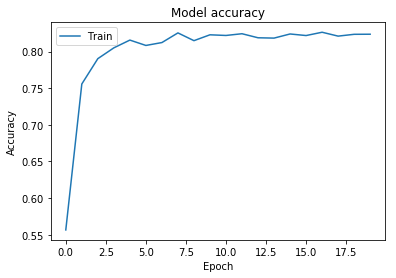

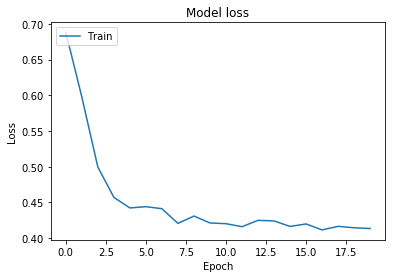

In [77]:

# 绘制训练 & 验证的准确率值
plt.plot(his.history['accuracy'])
# plt.plot(his.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(his.history['loss'])
# plt.plot(his.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [78]:
from keras.utils import plot_model
plot_model(classifier, to_file='model.png')

AttributeError: 'KerasClassifier' object has no attribute 'layers'

In [32]:
from sklearn import tree
import sys
import os 

with open("xq_dt.dot", 'w') as f:
    f = tree.export_graphviz(dtc, out_file='xq_dt')

import pydotplus 
dot_data = tree.export_graphviz(dtc, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("xq_dt.pdf") 

True